In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
# Plots the data points of each class; if provided, it will also plot the decision boundary
def scatter_plot(X, y, title, xlabel, ylabel, pred=None):
    plt.figure(figsize=(15, 10))
    plt.scatter(X[np.where(y == 0)[0]][:,0], X[np.where(y == 0)[0]][:,1], marker='+', color= '#A2D9CE', label='class 0')
    plt.scatter(X[np.where(y == 1)[0]][:,0], X[np.where(y == 1)[0]][:,1], marker='*', color= '#3CB371', label='class 1')
    plt.scatter(X[np.where(y == 2)[0]][:,0], X[np.where(y == 2)[0]][:,1], marker='.', color= '#90CAF9', label='class 2') 
    if pred:
        plt.scatter(X[pred][:,0], X[pred][:,1], marker='+', color= '#FF0000', label='misclassified')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axis('equal')
    plt.legend()
    plt.title(title)
    plt.show(block=False)

In [3]:
def get_misclassified(pred):
    missclassified_idxs = []
    for i in range(len(pred) - 1):
        if 3 <= i <= (len(pred) - 3):
            if ((pred[i - 1] != pred[i]) or (pred[i + 1] != pred[i])) and ((pred[i - 2] != pred[i]) or (pred[i + 2] != pred[i])) and ((pred[i - 3] != pred[i]) or (pred[i + 3] != pred[i])):
                missclassified_idxs.append(i)
    return missclassified_idxs

def check_misclassified(pred, missclassified):
    removed = False
    for i in missclassified:
        if ((pred[i - 1] == pred[i]) or (pred[i + 1] == pred[i])) and ((pred[i - 2] == pred[i]) or (pred[i + 2] == pred[i])):
            missclassified.remove(i)
            removed = True
    return removed

In [4]:
def proximity_function(x1, x2, theta_Mj):
    dist = (math.sin(theta_Mj)**2 * x1**2) 
    dist = dist + (math.cos(theta_Mj)**2 * x2**2)
    dist = dist - 2*math.sin(theta_Mj)*math.cos(theta_Mj)*x1*x2
    return dist

def compute_thetaj(u, j, X):
    num = 0
    den = 0
    for i in range(0, X.shape[0]):
        num = num + (u[i][j]*X[i, 0]*X[i, 1])
    num *= 2
    
    for i in range(0, X.shape[0]):
        den = den + (u[i][j]*(X[i, 0]**2 - X[i, 1]**2))
        
    return 0.5*math.atan2(num,den)


def compute_cost(X, u, theta_M):
    cost = 0
    for i in range(X.shape[0]):
        for j in range(theta_M.shape[0]):
            cost = cost + (u[i][j]*proximity_function(X[i, 0], X[i, 1], theta_M[j]))
    return cost

In [6]:
def assign_cluster(i, j, u, M, X, theta_M):
    list_proxs = []
    for idx_cluster in range(M): 
        list_proxs.append(proximity_function(X[i, 0], X[i, 1], theta_M[idx_cluster]))
    if list_proxs.index(min(list_proxs)) == j:
        u[i][j] = 1
    else:
        u[i][j] = 0
    return u

In [7]:
def do_crisp_clust(X, M, n_iter, n_attempts, eps):
    attempts = 0
    N = X.shape[0]
    theta_M = np.zeros((M))
    cost = 1
    while (attempts < n_attempts) & (cost > eps):
        for j in range(M):
            theta_M[j] = math.radians(random.randint(0, 360))
        u = np.zeros((N,M))
        for t in range(n_iter):
            for i in range(N):
                for j in range(M):
                    u = assign_cluster(i, j, u, M, X, theta_M)
            for j in range(M):
                theta_M[j] = compute_thetaj(u, j, X)
            cost = compute_cost(X, u, theta_M)
            print(f"#{attempts} cost: {cost}")
        attempts += 1
    return u, theta_M

In [8]:
#def do_fuzzy_clust(X, M, n_iter, n_attempts, eps, q):

In [9]:
group = '10'
ds = 3
data = np.loadtxt('datasets10/ds'+group+str(ds)+'.txt')
X = data[:, 0:2]
y = data[:, 2:3]

In [10]:
X.shape[0]

300

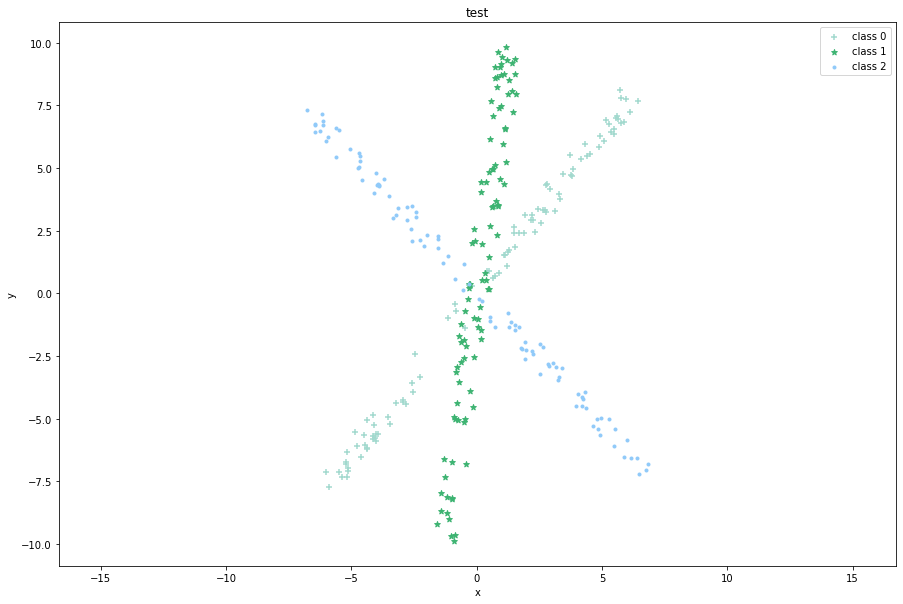

In [11]:
scatter_plot(X, y, "test", "x", "y")

In [12]:
M = 3
n_attempts = 10
n_iter = 100
eps = 0.001
u, theta_M = do_crisp_clust(X, M, n_iter, n_attempts, eps)

#0 cost: 932.4772993244216
#0 cost: 537.1836870636384
#0 cost: 452.62572992194237
#0 cost: 23.867433088538313
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521
#0 cost: 22.45587307037521

KeyboardInterrupt: 

In [ ]:
clusters_pred = np.zeros((len(u)))
for i in range(len(u)):
    if u[i][0] == 1.0:
        clusters_pred[i] = 0
    elif u[i][1] == 1.0:
        clusters_pred[i] = 1
    else: 
        clusters_pred[i] = 2

In [ ]:
unique, counts = np.unique(y, return_counts=True)

In [ ]:
counts

In [ ]:
unique, counts = np.unique(clusters_pred, return_counts=True)

In [ ]:
counts

In [ ]:
scatter_plot(X, clusters_pred, "test", "x", "y")

In [ ]:
clusters_pred = np.reshape(clusters_pred, (-1, 1))

In [ ]:
missclassified = get_misclassified(np.reshape(clusters_pred, -1))

In [ ]:
removed_missclassified = check_misclassified(np.reshape(clusters_pred, -1), missclassified)
while removed_missclassified:
    removed_missclassified = check_misclassified(np.reshape(clusters_pred, -1), missclassified)

In [ ]:
scatter_plot(X, y, "test", "x", "y", missclassified)